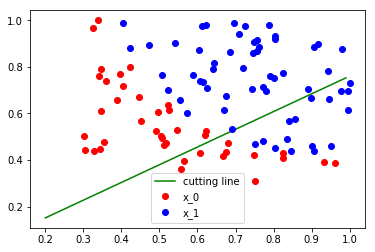

In [1]:
# pytorch实现爱你Logistic Regression:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn.functional as F

# 1，定义 logistic 回归模型
w = Variable(torch.randn(2, 1), requires_grad=True) 
b = Variable(torch.zeros(1), requires_grad=True)

def logistic_regression(x):
    return F.sigmoid(torch.mm(x, w) + b)


# 2，加载数据：
torch.manual_seed(2017)

with open('../DataSets/003data.txt', 'r') as f:
    data_list = [i.split('\n')[0].split(',') for i in f.readlines()]
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]


# 标准化
x0_max = max([i[0] for i in data])
x1_max = max([i[1] for i in data])
data = [(i[0]/x0_max, i[1]/x1_max, i[2]) for i in data]

x0 = list(filter(lambda x: x[-1] == 0.0, data)) # 选择第一类的点
x1 = list(filter(lambda x: x[-1] == 1.0, data)) # 选择第二类的点

plot_x0 = [i[0] for i in x0]
plot_y0 = [i[1] for i in x0]
plot_x1 = [i[0] for i in x1]
plot_y1 = [i[1] for i in x1]

np_data = np.array(data, dtype='float32') # 转换成 numpy array
x_data = torch.from_numpy(np_data[:, 0:2]) # 转换成 Tensor, 大小是 [100, 2]
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1) # 转换成 Tensor，大小是 [100, 1]


# 3,画出参数更新之前的结果
w0 = w[0].data[0].numpy()
w1 = w[1].data[0].numpy()
b0 = b.data[0].numpy()

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

In [2]:
# 4,计算loss
def binary_loss(y_pred, y):
    logits = (y * y_pred.clamp(1e-12).log() + (1 - y) * (1 - y_pred).clamp(1e-12).log()).mean()
    return -logits

x_data = Variable(x_data)
y_data = Variable(y_data)

y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.7078, grad_fn=<NegBackward>)


/home/jesse/anaconda3/envs/py36/lib/python3.6/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [3]:
# 5,自动求导并更新参数：
loss.backward()
w.data = w.data - 0.1 * w.grad.data
b.data = b.data - 0.1 * b.grad.data

# 算出一次更新之后的loss
y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

# 使用 torch.optim 更新参数
from torch import nn
w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

def logistic_regression(x):
    return F.sigmoid(torch.mm(x, w) + b)

optimizer = torch.optim.SGD([w, b], lr=1.)


# 进行 1000 次更新
import time

start = time.time()
for e in range(1000):
    # 前向传播
    y_pred = logistic_regression(x_data)
    loss = binary_loss(y_pred, y_data) # 计算 loss
    # 反向传播
    optimizer.zero_grad() # 使用优化器将梯度归 0
    loss.backward()
    optimizer.step() # 使用优化器来更新参数
    # 计算正确率
    mask = y_pred.ge(0.5).float()
    acc = (mask == y_data).sum().item() / y_data.shape[0]
    if (e + 1) % 200 == 0:
        print('epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.item(), acc))
during = time.time() - start
print()
print('During Time: {:.3f} s'.format(during))

tensor(0.7029, grad_fn=<NegBackward>)
epoch: 200, Loss: 0.39533, Acc: 0.91000
epoch: 400, Loss: 0.32387, Acc: 0.91000
epoch: 600, Loss: 0.29027, Acc: 0.91000
epoch: 800, Loss: 0.27053, Acc: 0.91000
epoch: 1000, Loss: 0.25748, Acc: 0.90000

During Time: 0.327 s


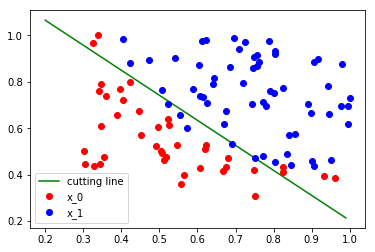

In [4]:
# 6，画图：
w0 = w[0].data[0].numpy()
w1 = w[1].data[0].numpy()
b0 = b.data[0].numpy()

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')